In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('titanic.csv')

print(df.head())

print("datas info:")
print(df.info())

# hypothesis: Women survived more?
# survived: 0 = No, 1 = Yes

print('survived by gender:')
print(df.groupby('Sex')['Survived'].mean())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
da

Вывод: Правило "Женщины и дети первыми" работало железно. Если ты мужчина на Титанике, то шансы на выживаемость так себе.

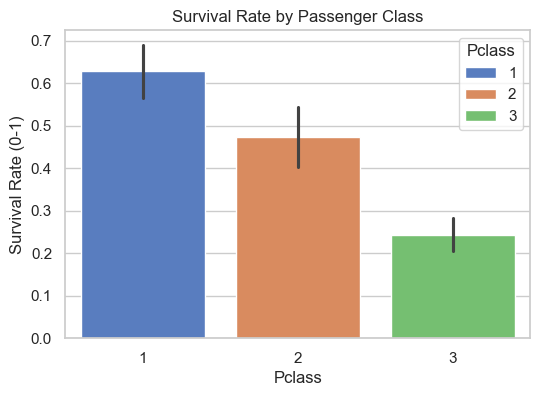

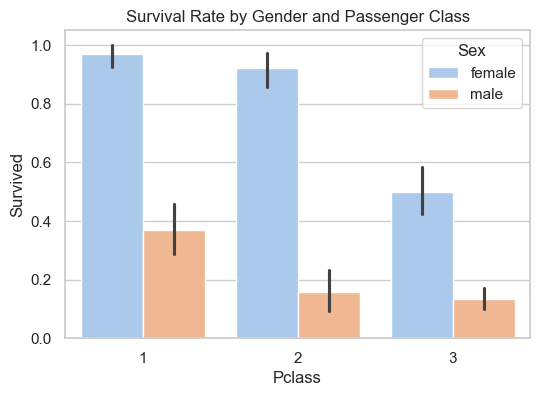

In [3]:
sns.set(style="whitegrid")

# plot 1: Survival rate by class (1st - richest, 3rd - poorest)
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (0-1)')
plt.show()

# plot 2: Survival rate by gender and class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

По первому графику заметно, что в первом классе выживаемость больше 0.6, значит, что выживали в основном богатые люди.

По второму графику можно сказать, что практически все женщины из 1-го и 2-го класса выжили, что не скажешь о мужчинах. Они гибли в независимости от класса.